In [1]:
import numpy as np
import time
import cv2

In [2]:
classes_path = '../input/opencv-semantic-segmentation/opencv-semantic-segmentation/enet-cityscapes/enet-classes.txt'
colors_path =  '../input/opencv-semantic-segmentation/opencv-semantic-segmentation/enet-cityscapes/enet-colors.txt'
model_path  =  '../input/opencv-semantic-segmentation/opencv-semantic-segmentation/enet-cityscapes/enet-model.net'
img_path   =   '../input/opencv-semantic-segmentation/opencv-semantic-segmentation/images/example_01.png'

In [3]:
with open(classes_path, 'r') as f:
    text = f.read()
CLASSES = text.strip().split("\n")

In [4]:
with open(colors_path, 'r') as c:
    COLORS = c.read().strip().split("\n")
COLORS = [np.array(c.split(",")).astype("int") for c in COLORS]
COLORS = np.array(COLORS, dtype="uint8")

In [5]:
import matplotlib.pyplot as plt
legend = np.zeros(((len(CLASSES) * 25) + 25, 300, 3), dtype="uint8")
 
# loop over the class names + colors
for (i, (className, color)) in enumerate(zip(CLASSES, COLORS)):
# draw the class name + color on the legend
    color = [int(c) for c in color]
    cv2.putText(legend, className, (5, (i * 25) + 17),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    cv2.rectangle(legend, (100, (i * 25)), (300, (i * 25) + 25),tuple(color), -1)


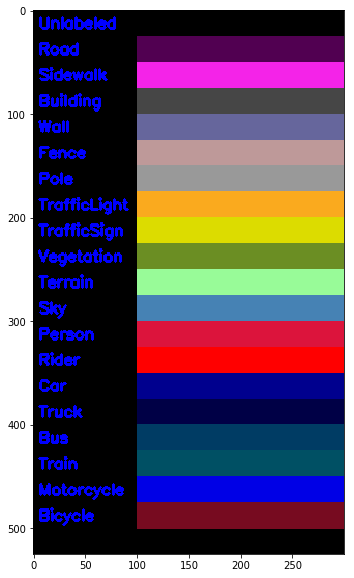

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(legend)

In [7]:
net = cv2.dnn.readNet(model_path)
image = cv2.imread(img_path)

In [8]:
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (1024, 512), 0,swapRB=True, crop=False)
 
# perform a forward pass using the segmentation model
net.setInput(blob)
start = time.time()
output = net.forward()

In [9]:
(numClasses, height, width) = output.shape[1:4]

In [10]:
classMap = np.argmax(output[0], axis=0)
 
# given the class ID map, we can map each of the class IDs to its
# corresponding color
mask = COLORS[classMap]

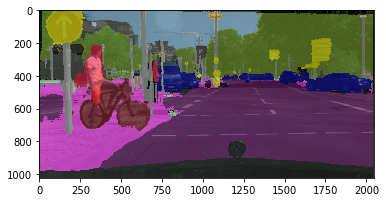

In [11]:
mask = cv2.resize(mask, (image.shape[1], image.shape[0]),interpolation=cv2.INTER_NEAREST)
classMap = cv2.resize(classMap, (image.shape[1], image.shape[0]),interpolation=cv2.INTER_NEAREST)
 
# perform a weighted combination of the input image with the mask to
# form an output visualization
output = ((0.4 * image) + (0.6 * mask)).astype("uint8")
 
# show the input and output images
plt.imshow(output)